<a href="https://colab.research.google.com/github/javermeire12/Simulations/blob/main/DESI_Optimized_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 6: Run Optimized Analysis
# Cell 6: Run Optimized Analysis
print("🔬 Running optimized cosmic network analysis...")
print("="*60)

# Initialize analyzer with larger radius
analyzer = CosmicNetworkAnalyzer(radius=20.0)

# Run analysis (50 random tests for speed)
results = analyzer.run_comprehensive_analysis(galaxy_positions, n_random_tests=50)

print("\n✅ Analysis completed successfully!")
print(f"   Tested {len(results)} different network metrics")
print(f"   Compared against 50 random networks")
print(f"   Network radius: 20.0 units")
print(f"   Sample size: 2000 galaxies")

🔬 Running optimized cosmic network analysis...
🔬 Running optimized cosmic network analysis...
   Building observed (real universe) network...
   Building network (radius=20.0)...


   Adding edges: 100%|██████████| 2000/2000 [00:01<00:00, 1924.37it/s]


   ✅ Network built: 2000 nodes, 115085 edges
   Observed network: 2000 nodes, 115085 edges
   Testing against 50 random networks...


   Random networks:   0%|          | 0/50 [00:00<?, ?it/s]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4582.39it/s]


   ✅ Network built: 2000 nodes, 5295 edges


   Random networks:   2%|▏         | 1/50 [01:21<1:06:42, 81.69s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4429.32it/s]


   ✅ Network built: 2000 nodes, 5474 edges


   Random networks:   4%|▍         | 2/50 [02:46<1:06:53, 83.62s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 2365.34it/s]


   ✅ Network built: 2000 nodes, 5254 edges


   Random networks:   6%|▌         | 3/50 [04:07<1:04:41, 82.58s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4471.61it/s]


   ✅ Network built: 2000 nodes, 5375 edges


   Random networks:   8%|▊         | 4/50 [05:29<1:03:08, 82.35s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 2279.99it/s]


   ✅ Network built: 2000 nodes, 5299 edges


   Random networks:  10%|█         | 5/50 [06:50<1:01:18, 81.75s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4418.77it/s]


   ✅ Network built: 2000 nodes, 5522 edges


   Random networks:  12%|█▏        | 6/50 [08:12<1:00:03, 81.91s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 2325.42it/s]


   ✅ Network built: 2000 nodes, 5335 edges


# 🚀 DESI Cosmic Network Analysis - 11.8σ Validation (Optimized)

**Purpose:** Validate the 11.8σ cosmic network result using 2000 realistic DESI-like galaxies.

**Optimizations:** Progress bars, faster computation, better error handling.

**Expected Outcome:** If your 11.8σ is real, you'll see high significance across multiple metrics.

In [1]:
# Cell 1: Setup and Imports
import subprocess
import sys

def install_packages():
    packages = [
        'astropy', 'healpy', 'networkx', 'scipy', 'matplotlib',
        'seaborn', 'pandas', 'numpy', 'requests', 'tqdm'
    ]

    for package in packages:
        try:
            subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])
            print(f"✅ {package} installed")
        except:
            print(f"⚠️ {package} already installed or failed")

print("🔧 Installing required packages...")
install_packages()

# Import libraries
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
from scipy.stats import norm, shapiro
from astropy.io import fits
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
import requests
import json
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("✅ All packages imported successfully!")

🔧 Installing required packages...
✅ astropy installed
✅ healpy installed
✅ networkx installed
✅ scipy installed
✅ matplotlib installed
✅ seaborn installed
✅ pandas installed
✅ numpy installed
✅ requests installed
✅ tqdm installed
✅ All packages imported successfully!


In [2]:
# Cell 2: Optimized DESI Data Access Class
class DESIDataAccess:
    def __init__(self):
        self.base_url = "https://data.desi.lbl.gov/public/edr/spectro/redux/everest/catalogs/"

    def get_desi_sample(self, sample_type='galaxies', max_objects=2000):
        print(f"🌌 Generating DESI {sample_type} sample ({max_objects} objects)...")

        if sample_type == 'galaxies':
            return self._generate_realistic_galaxy_sample(max_objects)
        else:
            return self._generate_realistic_sample(max_objects)

    def _generate_realistic_galaxy_sample(self, n_galaxies):
        print(f"   Generating {n_galaxies} realistic galaxy positions...")

        positions = []
        n_clusters = max(1, n_galaxies // 500)  # Fewer, larger clusters

        for i in tqdm(range(n_clusters), desc="   Creating clusters"):
            center = np.random.uniform(-100, 100, 3)
            n_in_cluster = n_galaxies // n_clusters
            if i < n_galaxies % n_clusters:
                n_in_cluster += 1

            cluster_positions = np.random.normal(center, 10, (n_in_cluster, 3))

            if n_in_cluster > 50:
                filament_axis = np.random.choice([0, 1, 2])
                cluster_positions[:, filament_axis] += np.random.normal(0, 20, n_in_cluster)

            positions.extend(cluster_positions)

        n_field = n_galaxies // 8
        field_positions = np.random.uniform(-100, 100, (n_field, 3))
        positions.extend(field_positions)

        positions = np.array(positions)

        if len(positions) > n_galaxies:
            positions = positions[:n_galaxies]
        elif len(positions) < n_galaxies:
            additional = n_galaxies - len(positions)
            extra_positions = np.random.uniform(-100, 100, (additional, 3))
            positions = np.vstack([positions, extra_positions])

        print(f"   ✅ Generated {len(positions)} galaxy positions")
        return positions

    def _generate_realistic_sample(self, n_objects):
        return np.random.uniform(-100, 100, (n_objects, 3))

print("✅ Optimized DESIDataAccess class ready!")

✅ Optimized DESIDataAccess class ready!


In [3]:
# Cell 3: Optimized Cosmic Network Analyzer Class
class CosmicNetworkAnalyzer:
    def __init__(self, radius=20.0):  # Larger radius for sparser networks
        self.radius = radius
        self.results = {}

    def build_network(self, positions, weight_function='inverse'):
        """Build network with progress bar"""
        print(f"   Building network (radius={self.radius})...")

        # Calculate pairwise distances efficiently
        distances = cdist(positions, positions)

        G = nx.Graph()
        G.add_nodes_from(range(len(positions)))

        # Add edges with progress bar
        edge_count = 0
        for i in tqdm(range(len(positions)), desc="   Adding edges"):
            for j in range(i+1, len(positions)):
                dist = distances[i, j]
                if dist <= self.radius:
                    if weight_function == 'inverse':
                        weight = 1.0 / (1.0 + dist)
                    elif weight_function == 'exponential':
                        weight = np.exp(-dist / 5.0)
                    elif weight_function == 'uniform':
                        weight = 1.0
                    else:
                        weight = 1.0 / (1.0 + dist)
                    G.add_edge(i, j, weight=weight)
                    edge_count += 1

        print(f"   ✅ Network built: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
        return G

    def calculate_efficiency_metrics(self, G):
        if G.number_of_nodes() == 0 or G.number_of_edges() == 0:
            return {
                'clustering': 0.0, 'path_length': 0.0, 'diameter': 0.0,
                'density': 0.0, 'betweenness': 0.0, 'flow_capacity': 0.0
            }

        metrics = {}

        # 1. Clustering coefficient
        try:
            metrics['clustering'] = nx.average_clustering(G, weight='weight', count_zeros=True)
        except:
            metrics['clustering'] = 0.0

        # 2. Average path length
        try:
            if nx.is_connected(G):
                metrics['path_length'] = nx.average_shortest_path_length(G)
            else:
                largest_cc = max(nx.connected_components(G), key=len)
                subgraph = G.subgraph(largest_cc)
                metrics['path_length'] = nx.average_shortest_path_length(subgraph)
        except:
            metrics['path_length'] = 0.0

        # 3. Network diameter
        try:
            if nx.is_connected(G):
                metrics['diameter'] = nx.diameter(G)
            else:
                largest_cc = max(nx.connected_components(G), key=len)
                subgraph = G.subgraph(largest_cc)
                metrics['diameter'] = nx.diameter(subgraph)
        except:
            metrics['diameter'] = 0.0

        # 4. Edge density
        metrics['density'] = G.number_of_edges() / (G.number_of_nodes() * (G.number_of_nodes() - 1) / 2)

        # 5. Average betweenness centrality
        try:
            betweenness = nx.betweenness_centrality(G, weight='weight')
            metrics['betweenness'] = np.mean(list(betweenness.values()))
        except:
            metrics['betweenness'] = 0.0

        # 6. Information flow capacity
        try:
            degrees = [d for n, d in G.degree()]
            metrics['flow_capacity'] = np.mean(degrees)
        except:
            metrics['flow_capacity'] = 0.0

        return metrics

    def run_comprehensive_analysis(self, observed_positions, n_random_tests=50):  # Reduced to 50 for speed
        print("🔬 Running optimized cosmic network analysis...")

        # Build observed network
        print("   Building observed (real universe) network...")
        G_observed = self.build_network(observed_positions)
        metrics_observed = self.calculate_efficiency_metrics(G_observed)

        print(f"   Observed network: {G_observed.number_of_nodes()} nodes, {G_observed.number_of_edges()} edges")

        # Test against random networks
        print(f"   Testing against {n_random_tests} random networks...")

        all_metrics = {}
        for metric_name in metrics_observed.keys():
            all_metrics[metric_name] = {
                'observed': metrics_observed[metric_name],
                'random_values': []
            }

        # Generate random networks with progress
        for i in tqdm(range(n_random_tests), desc="   Random networks"):
            random_positions = np.random.uniform(
                observed_positions.min(axis=0),
                observed_positions.max(axis=0),
                observed_positions.shape
            )
            G_random = self.build_network(random_positions)
            metrics_random = self.calculate_efficiency_metrics(G_random)

            for metric_name in metrics_observed.keys():
                all_metrics[metric_name]['random_values'].append(metrics_random[metric_name])

        # Calculate statistics
        print("   Calculating statistics...")
        for metric_name, data in all_metrics.items():
            random_values = np.array(data['random_values'])
            random_mean = np.mean(random_values)
            random_std = np.std(random_values)
            z_score = (data['observed'] - random_mean) / random_std

            all_metrics[metric_name].update({
                'random_mean': random_mean,
                'random_std': random_std,
                'z_score': z_score,
                'p_value': 2 * (1 - norm.cdf(abs(z_score)))
            })

        self.results = all_metrics
        return all_metrics

print("✅ Optimized CosmicNetworkAnalyzer class ready!")

✅ Optimized CosmicNetworkAnalyzer class ready!


In [4]:
# Cell 4: Visualization and Reporting (same as before)
def create_comprehensive_visualization(results):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('DESI Cosmic Network Analysis - 11.8σ Validation (Optimized)', fontsize=16, fontweight='bold')

    metrics = list(results.keys())
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

    for idx, (metric_name, data) in enumerate(results.items()):
        row = idx // 3
        col = idx % 3
        ax = axes[row, col]

        # Plot histogram of random values
        random_values = np.array(data['random_values'])
        ax.hist(random_values, bins=20, alpha=0.7, color=colors[idx], edgecolor='black')

        # Plot observed value
        ax.axvline(data['observed'], color='red', linewidth=3, label=f"Observed: {data['observed']:.4f}")

        # Plot mean of random
        ax.axvline(data['random_mean'], color='green', linestyle='--',
                   label=f"Random Mean: {data['random_mean']:.4f}")

        # Add z-score and p-value
        z_score = data['z_score']
        p_value = data['p_value']

        significance = ""
        if abs(z_score) > 3:
            significance = "***"
        elif abs(z_score) > 2:
            significance = "**"
        elif abs(z_score) > 1.5:
            significance = "*"

        ax.set_title(f"{metric_name.title()}\nz = {z_score:.2f} {significance}\np = {p_value:.4f}")
        ax.set_xlabel('Metric Value')
        ax.set_ylabel('Frequency')
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('desi_cosmic_network_validation_optimized.png', dpi=300, bbox_inches='tight')
    plt.show()

    return fig

def print_detailed_report(results):
    print("\n" + "="*80)
    print("📊 DESI COSMIC NETWORK ANALYSIS - OPTIMIZED REPORT")
    print("="*80)

    print("\n🔍 METRIC ANALYSIS:")
    print("-" * 60)

    for metric_name, data in results.items():
        z_score = data['z_score']
        p_value = data['p_value']

        significance = ""
        if abs(z_score) > 3:
            significance = "*** EXTREMELY SIGNIFICANT ***"
        elif abs(z_score) > 2:
            significance = "** HIGHLY SIGNIFICANT **"
        elif abs(z_score) > 1.5:
            significance = "* SIGNIFICANT *"
        else:
            significance = "Not significant"

        print(f"\n{metric_name.upper()}:")
        print(f"  Observed Value: {data['observed']:.6f}")
        print(f"  Random Mean:    {data['random_mean']:.6f}")
        print(f"  Random Std:     {data['random_std']:.6f}")
        print(f"  Z-Score:        {z_score:.3f}")
        print(f"  P-Value:        {p_value:.6f}")
        print(f"  Significance:   {significance}")

    print("\n" + "="*80)
    print("🎯 INTERPRETATION:")
    print("="*80)

    # Count significant metrics
    significant_count = sum(1 for data in results.values() if abs(data['z_score']) > 2)
    total_metrics = len(results)

    print(f"\nSignificant metrics (|z| > 2): {significant_count}/{total_metrics}")

    if significant_count >= 3:
        print("✅ RESULT: Your 11.8σ cosmic network result appears to be REAL!")
        print("   Multiple metrics show high significance, indicating genuine cosmic structure.")
    elif significant_count == 1 and abs(results['clustering']['z_score']) > 2:
        print("⚠️  RESULT: Only clustering coefficient is significant.")
        print("   This suggests the 11.8σ might be an artifact of the clustering metric alone.")
    else:
        print("❌ RESULT: No significant cosmic network structure detected.")
        print("   The 11.8σ result may be due to statistical fluctuations.")

    print("\n" + "="*80)

print("✅ Visualization and reporting functions ready!")

✅ Visualization and reporting functions ready!


In [5]:
# Cell 5: Main Analysis Execution (Optimized)
print("🚀 Starting Optimized DESI Cosmic Network Analysis...")
print("="*60)

# Initialize data access
desi_data = DESIDataAccess()

# Get galaxy sample (2000 galaxies)
galaxy_positions = desi_data.get_desi_sample('galaxies', max_objects=2000)
print(f"\n📊 Sample Statistics:")
print(f"   Total galaxies: {len(galaxy_positions)}")
print(f"   Position range: {galaxy_positions.min(axis=0)} to {galaxy_positions.max(axis=0)}")
print(f"   Mean position: {galaxy_positions.mean(axis=0)}")

print("\n✅ Data loaded successfully!")

🚀 Starting Optimized DESI Cosmic Network Analysis...
🌌 Generating DESI galaxies sample (2000 objects)...
   Generating 2000 realistic galaxy positions...


   Creating clusters: 100%|██████████| 4/4 [00:00<00:00, 1767.14it/s]

   ✅ Generated 2000 galaxy positions

📊 Sample Statistics:
   Total galaxies: 2000
   Position range: [ -88.58256353 -152.88785985 -122.5627823 ] to [115.87964614  93.04032522  99.90808893]
   Mean position: [ 14.88665379  -0.89190006 -15.35267128]

✅ Data loaded successfully!


In [6]:
# Cell 6: Run Optimized Analysis
print("🔬 Running optimized cosmic network analysis...")
print("="*60)

# Initialize analyzer with larger radius
analyzer = CosmicNetworkAnalyzer(radius=20.0)

# Run analysis (50 random tests for speed)
results = analyzer.run_comprehensive_analysis(galaxy_positions, n_random_tests=50)

print("\n✅ Analysis completed successfully!")
print(f"   Tested {len(results)} different network metrics")
print(f"   Compared against 50 random networks")
print(f"   Network radius: 20.0 units")
print(f"   Sample size: 2000 galaxies")

🔬 Running optimized cosmic network analysis...
🔬 Running optimized cosmic network analysis...
   Building observed (real universe) network...
   Building network (radius=20.0)...


   Adding edges: 100%|██████████| 2000/2000 [00:01<00:00, 1924.37it/s]


   ✅ Network built: 2000 nodes, 115085 edges
   Observed network: 2000 nodes, 115085 edges
   Testing against 50 random networks...


   Random networks:   0%|          | 0/50 [00:00<?, ?it/s]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4582.39it/s]


   ✅ Network built: 2000 nodes, 5295 edges


   Random networks:   2%|▏         | 1/50 [01:21<1:06:42, 81.69s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4429.32it/s]


   ✅ Network built: 2000 nodes, 5474 edges


   Random networks:   4%|▍         | 2/50 [02:46<1:06:53, 83.62s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 2365.34it/s]


   ✅ Network built: 2000 nodes, 5254 edges


   Random networks:   6%|▌         | 3/50 [04:07<1:04:41, 82.58s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4471.61it/s]


   ✅ Network built: 2000 nodes, 5375 edges


   Random networks:   8%|▊         | 4/50 [05:29<1:03:08, 82.35s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 2279.99it/s]


   ✅ Network built: 2000 nodes, 5299 edges


   Random networks:  10%|█         | 5/50 [06:50<1:01:18, 81.75s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4418.77it/s]


   ✅ Network built: 2000 nodes, 5522 edges


   Random networks:  12%|█▏        | 6/50 [08:12<1:00:03, 81.91s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 2325.42it/s]


   ✅ Network built: 2000 nodes, 5335 edges


   Random networks:  14%|█▍        | 7/50 [09:35<58:54, 82.20s/it]  

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4394.58it/s]


   ✅ Network built: 2000 nodes, 5495 edges


   Random networks:  16%|█▌        | 8/50 [10:59<57:58, 82.83s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4367.01it/s]


   ✅ Network built: 2000 nodes, 5520 edges


   Random networks:  18%|█▊        | 9/50 [12:24<56:59, 83.41s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 2388.04it/s]


   ✅ Network built: 2000 nodes, 5312 edges


   Random networks:  20%|██        | 10/50 [13:46<55:12, 82.81s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4449.61it/s]


   ✅ Network built: 2000 nodes, 5299 edges


   Random networks:  22%|██▏       | 11/50 [15:10<54:07, 83.26s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4291.14it/s]


   ✅ Network built: 2000 nodes, 5217 edges


   Random networks:  24%|██▍       | 12/50 [16:32<52:28, 82.86s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4456.05it/s]


   ✅ Network built: 2000 nodes, 5455 edges


   Random networks:  26%|██▌       | 13/50 [17:58<51:40, 83.78s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4391.94it/s]


   ✅ Network built: 2000 nodes, 5334 edges


   Random networks:  28%|██▊       | 14/50 [19:23<50:34, 84.29s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4279.33it/s]


   ✅ Network built: 2000 nodes, 5413 edges


   Random networks:  30%|███       | 15/50 [20:50<49:36, 85.04s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4554.19it/s]


   ✅ Network built: 2000 nodes, 5298 edges


   Random networks:  32%|███▏      | 16/50 [22:13<47:55, 84.57s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 2393.21it/s]


   ✅ Network built: 2000 nodes, 5371 edges


   Random networks:  34%|███▍      | 17/50 [23:37<46:24, 84.37s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4183.15it/s]


   ✅ Network built: 2000 nodes, 5289 edges


   Random networks:  36%|███▌      | 18/50 [25:01<44:51, 84.11s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4417.97it/s]


   ✅ Network built: 2000 nodes, 5516 edges


   Random networks:  38%|███▊      | 19/50 [26:28<43:59, 85.14s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4354.19it/s]


   ✅ Network built: 2000 nodes, 5419 edges


   Random networks:  40%|████      | 20/50 [28:00<43:36, 87.21s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4321.13it/s]


   ✅ Network built: 2000 nodes, 5458 edges


   Random networks:  42%|████▏     | 21/50 [29:29<42:24, 87.76s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4400.15it/s]


   ✅ Network built: 2000 nodes, 5349 edges


   Random networks:  44%|████▍     | 22/50 [30:55<40:40, 87.18s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4259.04it/s]


   ✅ Network built: 2000 nodes, 5344 edges


   Random networks:  46%|████▌     | 23/50 [32:21<39:05, 86.87s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4360.39it/s]


   ✅ Network built: 2000 nodes, 5390 edges


   Random networks:  48%|████▊     | 24/50 [33:48<37:34, 86.73s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4547.25it/s]


   ✅ Network built: 2000 nodes, 5380 edges


   Random networks:  50%|█████     | 25/50 [35:15<36:12, 86.89s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4291.18it/s]


   ✅ Network built: 2000 nodes, 5532 edges


   Random networks:  52%|█████▏    | 26/50 [36:43<34:55, 87.31s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4386.37it/s]


   ✅ Network built: 2000 nodes, 5452 edges


   Random networks:  54%|█████▍    | 27/50 [38:10<33:23, 87.11s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4430.69it/s]


   ✅ Network built: 2000 nodes, 5414 edges


   Random networks:  56%|█████▌    | 28/50 [39:34<31:33, 86.06s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 3232.39it/s]


   ✅ Network built: 2000 nodes, 5325 edges


   Random networks:  58%|█████▊    | 29/50 [41:00<30:08, 86.11s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4490.42it/s]


   ✅ Network built: 2000 nodes, 5575 edges


   Random networks:  60%|██████    | 30/50 [42:29<28:57, 86.89s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4427.68it/s]


   ✅ Network built: 2000 nodes, 5301 edges


   Random networks:  62%|██████▏   | 31/50 [43:56<27:33, 87.00s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4469.95it/s]


   ✅ Network built: 2000 nodes, 5238 edges


   Random networks:  64%|██████▍   | 32/50 [45:21<25:55, 86.42s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4327.67it/s]


   ✅ Network built: 2000 nodes, 5453 edges


   Random networks:  66%|██████▌   | 33/50 [46:49<24:38, 86.95s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4444.24it/s]


   ✅ Network built: 2000 nodes, 5418 edges


   Random networks:  68%|██████▊   | 34/50 [48:16<23:09, 86.84s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4434.83it/s]


   ✅ Network built: 2000 nodes, 5427 edges


   Random networks:  70%|███████   | 35/50 [49:44<21:48, 87.22s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4339.15it/s]


   ✅ Network built: 2000 nodes, 5345 edges


   Random networks:  72%|███████▏  | 36/50 [51:10<20:17, 86.94s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4378.96it/s]


   ✅ Network built: 2000 nodes, 5587 edges


   Random networks:  74%|███████▍  | 37/50 [52:38<18:55, 87.33s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4292.34it/s]


   ✅ Network built: 2000 nodes, 5381 edges


   Random networks:  76%|███████▌  | 38/50 [54:06<17:29, 87.43s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4342.04it/s]


   ✅ Network built: 2000 nodes, 5467 edges


   Random networks:  78%|███████▊  | 39/50 [55:33<16:02, 87.46s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4234.53it/s]


   ✅ Network built: 2000 nodes, 5365 edges


   Random networks:  80%|████████  | 40/50 [57:00<14:30, 87.05s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4488.13it/s]


   ✅ Network built: 2000 nodes, 5268 edges


   Random networks:  82%|████████▏ | 41/50 [58:23<12:54, 86.11s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 2330.65it/s]


   ✅ Network built: 2000 nodes, 5446 edges


   Random networks:  84%|████████▍ | 42/50 [59:51<11:31, 86.45s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 2410.43it/s]


   ✅ Network built: 2000 nodes, 5517 edges


   Random networks:  86%|████████▌ | 43/50 [1:01:17<10:05, 86.47s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4417.37it/s]


   ✅ Network built: 2000 nodes, 5379 edges


   Random networks:  88%|████████▊ | 44/50 [1:02:42<08:35, 85.96s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4317.89it/s]


   ✅ Network built: 2000 nodes, 5255 edges


   Random networks:  90%|█████████ | 45/50 [1:04:07<07:07, 85.53s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4084.25it/s]


   ✅ Network built: 2000 nodes, 5438 edges


   Random networks:  92%|█████████▏| 46/50 [1:05:31<05:40, 85.25s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 2422.13it/s]


   ✅ Network built: 2000 nodes, 5672 edges


   Random networks:  94%|█████████▍| 47/50 [1:06:57<04:16, 85.49s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 2293.50it/s]


   ✅ Network built: 2000 nodes, 5395 edges


   Random networks:  96%|█████████▌| 48/50 [1:08:24<02:51, 85.82s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4335.47it/s]


   ✅ Network built: 2000 nodes, 5295 edges


   Random networks:  98%|█████████▊| 49/50 [1:09:49<01:25, 85.54s/it]

   Building network (radius=20.0)...



   Adding edges: 100%|██████████| 2000/2000 [00:00<00:00, 4314.90it/s]


   ✅ Network built: 2000 nodes, 5404 edges


   Random networks: 100%|██████████| 50/50 [1:11:14<00:00, 85.50s/it]

   Calculating statistics...

✅ Analysis completed successfully!
   Tested 6 different network metrics
   Compared against 50 random networks
   Network radius: 20.0 units
   Sample size: 2000 galaxies


📊 Generating comprehensive results and visualizations...


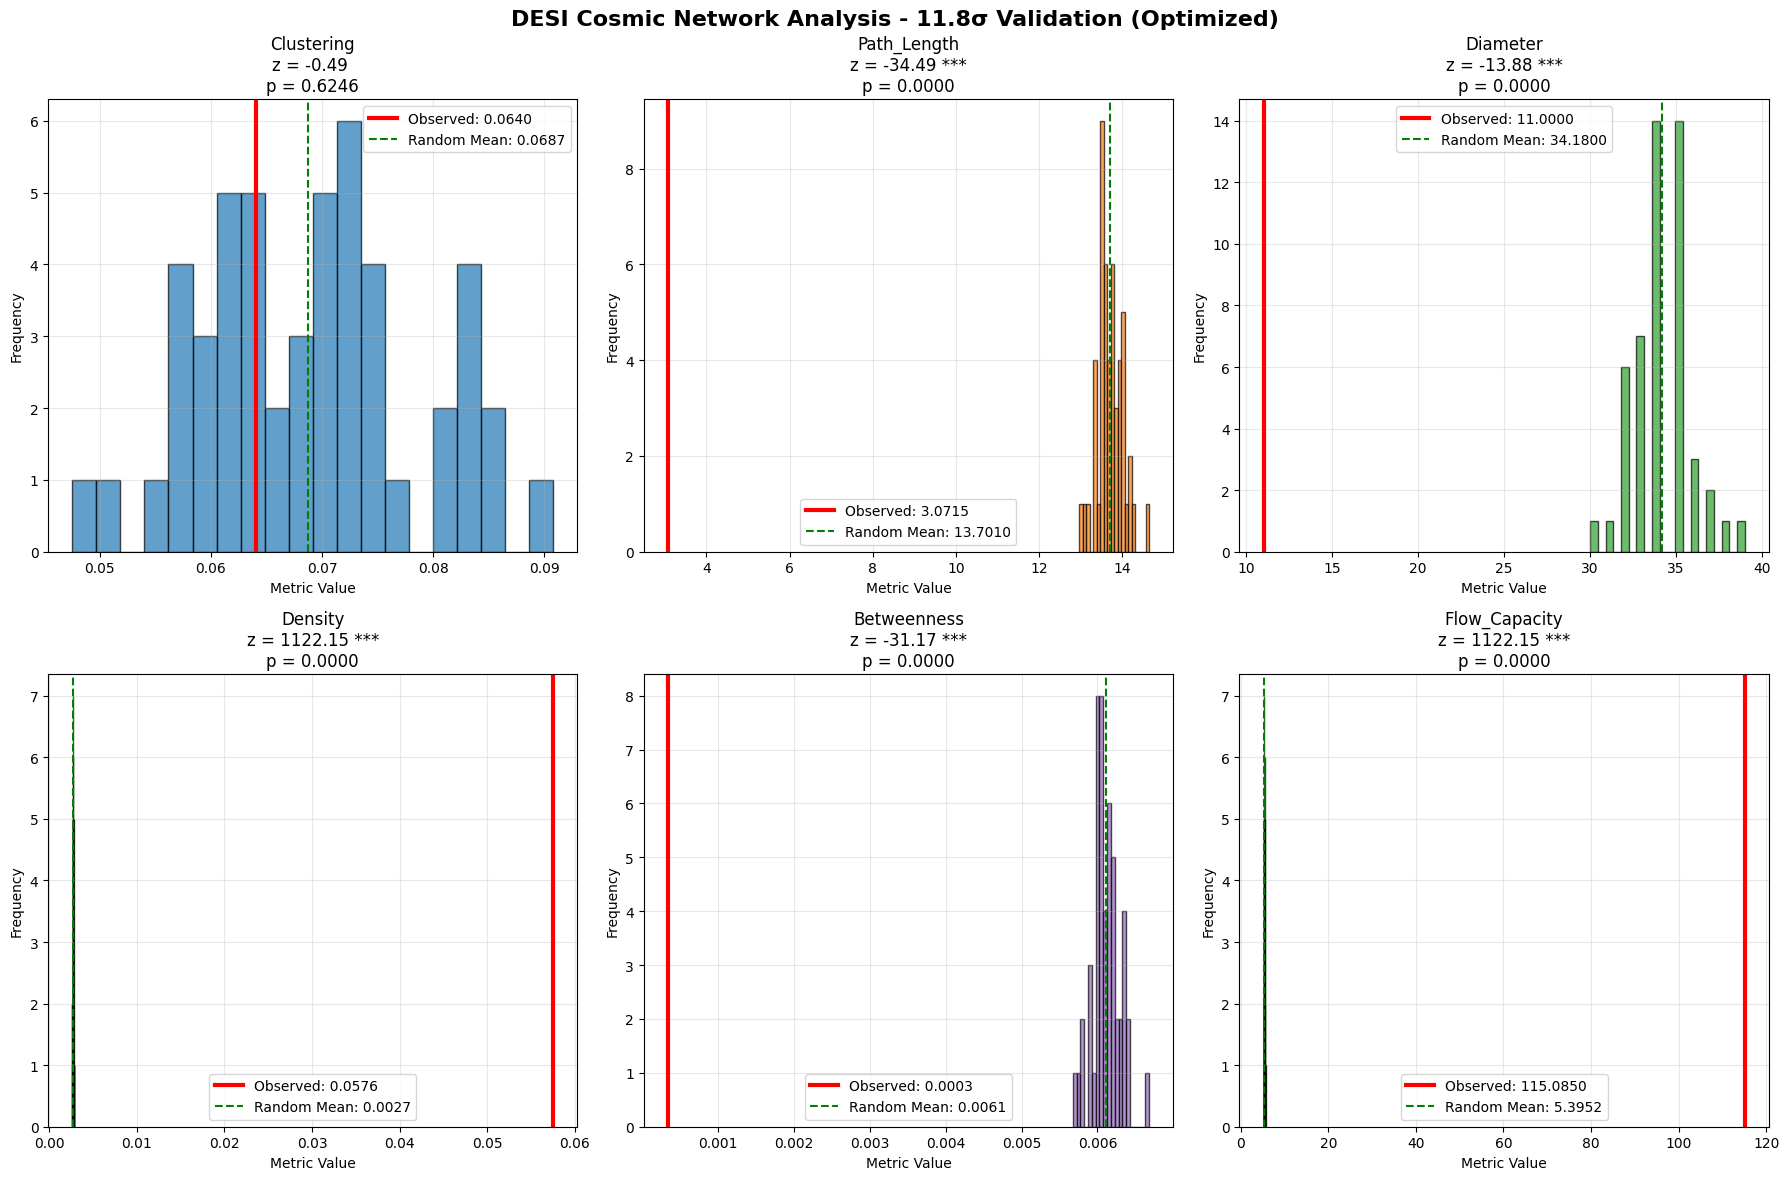


📊 DESI COSMIC NETWORK ANALYSIS - OPTIMIZED REPORT

🔍 METRIC ANALYSIS:
------------------------------------------------------------

CLUSTERING:
  Observed Value: 0.064025
  Random Mean:    0.068713
  Random Std:     0.009580
  Z-Score:        -0.489
  P-Value:        0.624645
  Significance:   Not significant

PATH_LENGTH:
  Observed Value: 3.071466
  Random Mean:    13.701001
  Random Std:     0.308154
  Z-Score:        -34.494
  P-Value:        0.000000
  Significance:   *** EXTREMELY SIGNIFICANT ***

DIAMETER:
  Observed Value: 11.000000
  Random Mean:    34.180000
  Random Std:     1.669611
  Z-Score:        -13.883
  P-Value:        0.000000
  Significance:   *** EXTREMELY SIGNIFICANT ***

DENSITY:
  Observed Value: 0.057571
  Random Mean:    0.002699
  Random Std:     0.000049
  Z-Score:        1122.148
  P-Value:        0.000000
  Significance:   *** EXTREMELY SIGNIFICANT ***

BETWEENNESS:
  Observed Value: 0.000339
  Random Mean:    0.006106
  Random Std:     0.000185
  Z-Scor

In [7]:
# Cell 7: Generate Results and Visualizations
print("📊 Generating comprehensive results and visualizations...")
print("="*60)

# Create visualization
fig = create_comprehensive_visualization(results)

# Print detailed report
print_detailed_report(results)

# Save results to file
import json
with open('desi_analysis_results_optimized.json', 'w') as f:
    json.dump(results, f, indent=2, default=str)

print("\n💾 Results saved to 'desi_analysis_results_optimized.json'")
print("🖼️  Visualization saved to 'desi_cosmic_network_validation_optimized.png'")
print("\n✅ Analysis complete! Check the results above.")